<a href="https://colab.research.google.com/github/ImShrekNotTanya/LB4_03_Prob_Theory/blob/master/LB4_03_Vakulenko_Adabeli_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 2:** Реализовать все методы из статьи для получения бросков кубика (100, 1000, 10000, 1000000) и построить гистограмму для каждого из бросков

Введите число бросков для кубика (100, 1000, 10000, 1000000): 
100
Ваши броски:    Количество выпаданий  Частота  Вероятность
1                     1       18         0.18
2                     2       14         0.14
3                     3       13         0.13
4                     4       21         0.21
5                     5       16         0.16
6                     6       18         0.18

Метод 1:


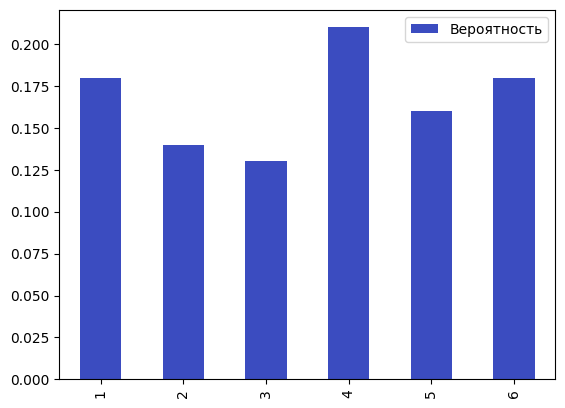

100
Ваши броски:    Количество выпаданий  Частота  Вероятность
1                     1       22         0.22
2                     2       25         0.25
3                     3       18         0.18
4                     4       14         0.14
5                     5       21         0.21
6                     6        0         0.00

Метод 2:


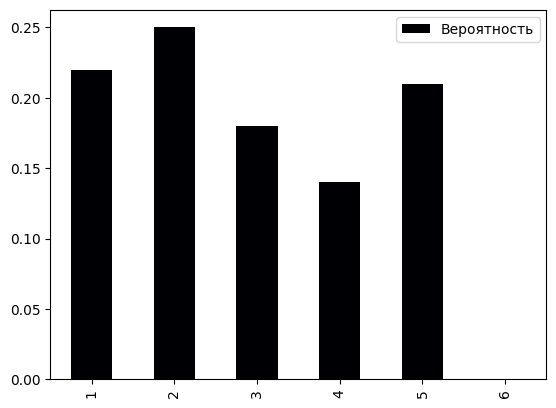

100
Ваши броски:    Количество выпаданий  Частота  Вероятность
1                     1       18         0.18
2                     2       19         0.19
3                     3       27         0.27
4                     4       17         0.17
5                     5       19         0.19
6                     6        0         0.00

Метод 3:


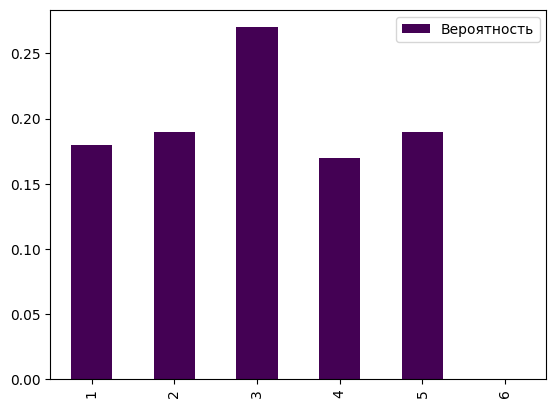

100
Ваши броски:    Количество выпаданий  Частота  Вероятность
1                     1       12         0.12
2                     2       18         0.18
3                     3       18         0.18
4                     4       14         0.14
5                     5       20         0.20
6                     6       18         0.18

Метод 4:


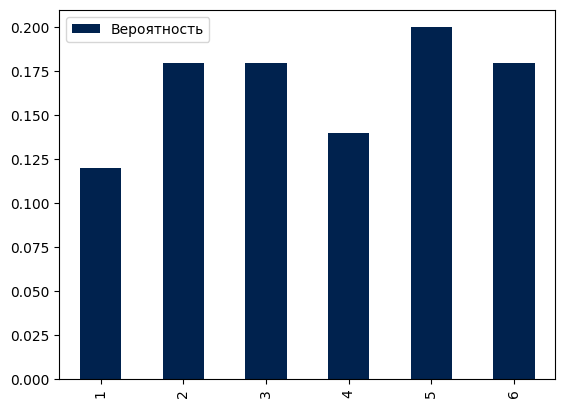

In [21]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Первый метод
def kubik(n: int) -> list:

    # :param n: Количество подбрасываний
    # :return:  Список случайных подбрасываний кубика

    # random.sample - генерирует n случайных чисел в списке в заданном диапазоне и возвращает нужный список

    all_result = []

    data = random.sample(range(1, 7), 6)  # Получаем n уникальных случайных чисел от 1 до 6

    for _ in range(n - 6):  # Оставшиеся броски будут повторениями
        all_result.append(random.choice(data))

    all_result += data  # Добавляем уникальные результаты
    random.shuffle(all_result)  # Перемешиваем для случайности
    return all_result

# Второй метод
def kubik_2(n: int) -> list:

    # :param n: Количество подбрасываний
    # :return:  Список случайных подбрасываний кубика

    # random.choices - альтернатива random.sample(, для исключения ошибки

    data = random.choices(range(1, 6), k=n)  # Получаем n случайных чисел от 1 до 6 с возможностью повторений
    return data

# Третий метод
def kubik_3(n: int) -> list:

    # :param n: Количество подбрасываний
    # :return:  Список случайных подбрасываний кубика

    # randrange - генератор списков

    data = [random.randrange(1, 6) for _ in range(n)]  # Генерируем n случайных чисел от 1 до 6
    return data

# Четвертый метод
def kubik_4(n: int) -> list:

    # :param n: Количество подбрасываний
    # :return:  Список случайных подбрасываний кубика

    data = []
    for _ in range(n):  # Используем цикл для n подбрасываний
        data.append(random.randint(1, 6))  # Генерируем случайное число от 1 до 6 и добавляем в список
    return data

def count_rate(kub_data: list):

  # Возвращает частоту выпадания значений кубика,
  # согласно полученным данным
  # :param kub_data: данные эксперимента
  # :return:

    kub_rate = {}
    for i in kub_data:
        if i in kub_rate:
            continue
        else:
            kub_rate[i] = kub_data.count(i)
    for i in range(1, 7):
        if i not in kub_rate:
            kub_rate[i] = 0
    return kub_rate

def sort_rate(counted_rate: dict):

    # Возвращает отсортированную частоту по ключу
    # :param counted_rate: Наша неотсортированная частота
    # :return:

    sorted_rate = {}
    for key in sorted(counted_rate.keys()):
        sorted_rate[key] = counted_rate[key]
    return sorted_rate

def crate_dataframe(sorted_date: dict):

    # Создание и преобразование данных в Pandas dataframe
    # :param sorted_date: dict
    # :return: pd.Dataframe

    df = pd.DataFrame(sorted_date, index=[0])
    df = df.T
    df = df.rename(columns={0: 'Частота'})
    df.insert(0, 'Количество выпаданий', range(1, 1 + len(df)))
    return df

def probability_solving(dataframe: pd.DataFrame):

    # Вычисление вероятности полученных результатов
    # :param dataframe:
    # :return:

    sum_rate = dataframe['Частота'].sum()
    probability = []
    for i in dataframe['Частота']:
        probability.append(i / sum_rate)
    dataframe['Вероятность'] = probability
    return dataframe

print("Введите число бросков для кубика (100, 1000, 10000, 1000000): ")

proba = probability_solving(crate_dataframe(sort_rate(count_rate(kubik(n = int(input()))))))
print(f'Ваши броски: {proba}')
print("\nМетод 1:")
# Построение гистограммы
a = proba['Вероятность'].plot(kind='bar', legend=True, cmap='coolwarm')
plt.show()

proba_2 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik_2(n = int(input()))))))
print(f'Ваши броски: {proba_2}')
print("\nМетод 2:")
# Построение гистограммы
a = proba_2['Вероятность'].plot(kind='bar', legend=True, cmap='inferno')
plt.show()

proba_3 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik_3(n = int(input()))))))
print(f'Ваши броски: {proba_3}')
print("\nМетод 3:")
# Построение гистограммы
a = proba_3['Вероятность'].plot(kind='bar', legend=True, cmap='viridis')
plt.show()

proba4 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik_4(n = int(input()))))))
print(f'Ваши броски: {proba4}')
print("\nМетод 4:")
# Построение гистограммы
a = proba4['Вероятность'].plot(kind='bar', legend=True, cmap='cividis')
plt.show()